# Tasks for laboratory assignment 3

In [1]:
# imports section

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.preprocessing import PolynomialFeatures


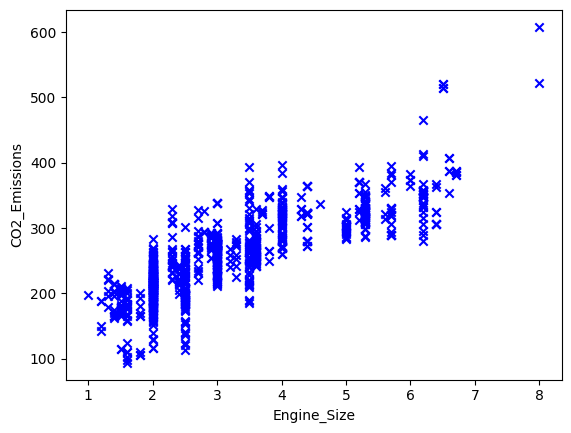

In [7]:
def build_plot(file_path, x, y):
    data = pd.read_csv(file_path)
    plt.scatter(data[x], data[y], c='blue', marker='x')
    plt.xlabel(x)
    plt.ylabel(y)
    return plt

build_plot('resources/CO2_emission.csv', 'Engine_Size', 'CO2_Emissions').show()


In [2]:
def extract_texts_from_file(file_path):
    """
    Extract the text data from the csv file

    Args:
        file_path (str): Relative location of the csv file in the project.

    Returns:
        list: The list of texts as strings.
    """
    return pd.read_csv(file_path) 

data = extract_texts_from_file('resources/heart.csv')
print(data[:50])

    age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0    63    1   3     145   233    1        0       150     0      2.3    0   
1    37    1   2     130   250    0        1       187     0      3.5    0   
2    41    0   1     130   204    0        0       172     0      1.4    2   
3    56    1   1     120   236    0        1       178     0      0.8    2   
4    57    0   0     120   354    0        1       163     1      0.6    2   
5    57    1   0     140   192    0        1       148     0      0.4    1   
6    56    0   1     140   294    0        0       153     0      1.3    1   
7    44    1   1     120   263    0        1       173     0      0.0    2   
8    52    1   2     172   199    1        1       162     0      0.5    2   
9    57    1   2     150   168    0        1       174     0      1.6    2   
10   54    1   0     140   239    0        1       160     0      1.2    2   
11   48    0   2     130   275    0        1       139     0    

## CO2 emissions

Process file `CO2_emission.csv`. Build a model, that would predict CO2 emissions from the size of the engine of car. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

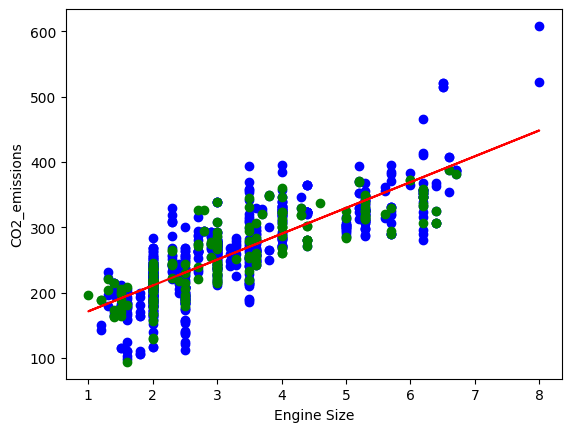

R2: 0.682753821269109
MSE: 1099.9343154847518


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

def CO2_emissions(data):
    """
    Build a model that would predict CO2 emissions from the size of the engine of car. Visualize model on a plot.

    Args:
        data: CO2 emissions data.

    Returns:
        list: The list of model theta parameters.
    """
    x, y = (data["Engine_Size"].values.reshape(-1, 1), data["CO2_Emissions"].values.reshape(-1, 1))
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    plt.scatter(x_train, y_train, color="blue")
    plt.scatter(x_test, y_test, color="green")
    plt.plot(x, model.predict(x), color="red")
    plt.xlabel("Engine Size")
    plt.ylabel("CO2_emissions")
    plt.show()
    print(f"R2: {r2_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    return model.coef_.tolist() 

data = extract_texts_from_file('resources/CO2_emission.csv')
CO2_emissions(data)

## Ice Cream Sales

Process file `ice_cream_selling_data.csv`. Build a model, that would predict ice cream sales based on the temperature. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

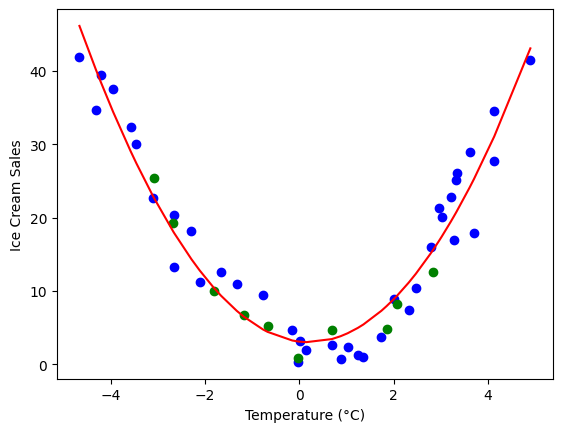

R2: 0.9292619183687262
MSE: 3.5558642718033155


(array([[ 0.        , -0.7501868 ,  1.81793144]]), array([3.09509856]))

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def ice_cream_selling(data):
    """
    Build a model, that would predict ice cream sales based on the temperature. Visualize model on a plot.

    Args:
        data: ice cream sales data.

    Returns:
        list: The list of model theta parameters.
    """
    x, y = data[data.columns[0]].values.reshape(-1, 1), data[data.columns[1]].values.reshape(-1, 1)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    
    model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    plt.scatter(x_train, y_train, color="blue", label="Training data")
    plt.scatter(x_test, y_test, color="green", label="Test data")
    plt.plot(x, model.predict(x), color="red", label="Prediction line")
    plt.xlabel("Temperature (°C)")
    plt.ylabel("Ice Cream Sales")
    plt.show()
    
    print(f"R2: {r2_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    
    return model.named_steps['linearregression'].coef_, model.named_steps['linearregression'].intercept_

data = extract_texts_from_file('resources/ice_cream_selling_data.csv')
ice_cream_selling(data)

## Electric Power Consumption

Process file `powerconsumption.csv`. Build a model, that would predict electricity consumption from the weather: temperature, humidity and wind speed. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

R2: 0.20797904208993065
MSE: 31764343.664985176


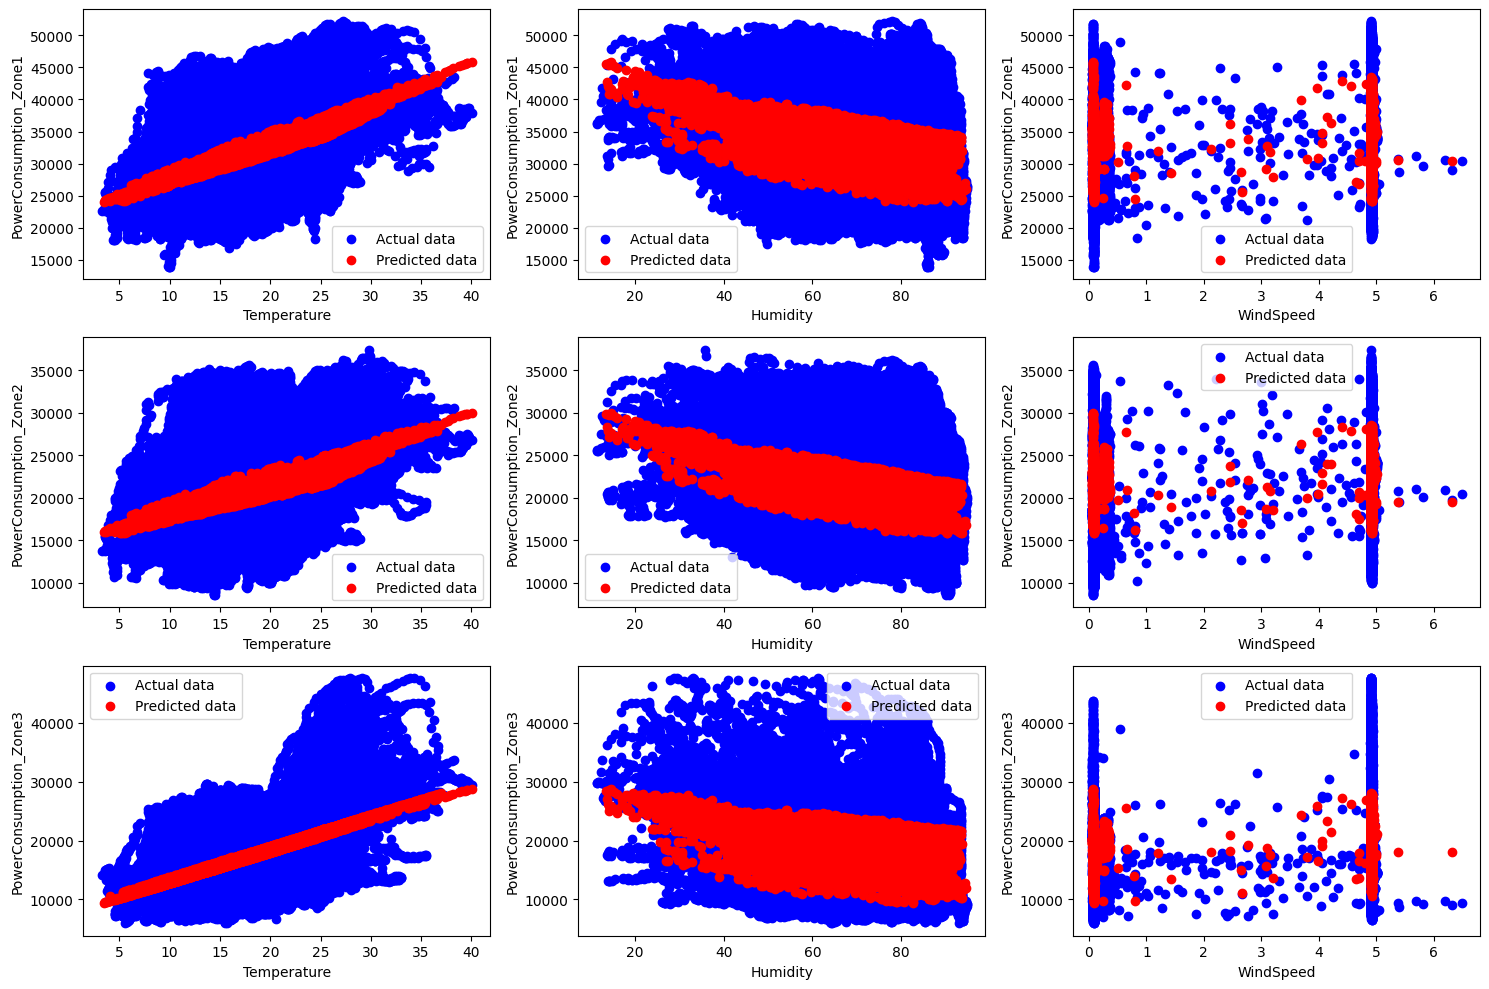

[26205.744832837587,
 508.35046110897406,
 -46.80647978519289,
 -124.07876727950658]

In [22]:
def power_consumption(data):
    """
    Build a model, that would predict electricity consumption from the weather: temperature, humidity and wind speed. 
    Visualize model on a plot.

    Args:
        data: power consumption data.

    Returns:
        list: The list of model theta parameters.
    """
    X = data[["Temperature", "Humidity", "WindSpeed"]]
    y = data[["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"]] 
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    print(f"R2: {r2_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")

    fig, axs = plt.subplots(3, 3, figsize=(15, 10))
    
    for i, zone in enumerate(["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"]):
        for j, feature in enumerate(["Temperature", "Humidity", "WindSpeed"]):
            axs[i, j].scatter(data[feature], data[zone], color="blue", label="Actual data")
            axs[i, j].scatter(X_test.iloc[:, j], y_pred[:, i], color="red", label="Predicted data")
            axs[i, j].set_xlabel(f"{feature}")
            axs[i, j].set_ylabel(f"{zone}")
            axs[i, j].legend()
    plt.tight_layout()
    plt.show()
    
    # Return model parameters (coefficients)
    return [model.intercept_[0]] + list(model.coef_[0])

data = extract_texts_from_file('resources/powerconsumption.csv')
power_consumption(data)

## Heart Conditions Predictions

Process file `heart.csv`. It has the following data:

- age - Age of the patient
- sex - Sex of the patient
- cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
- trtbps - Resting blood pressure (in mm Hg)
- chol - Cholestoral in mg/dl fetched via BMI sensor
- fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
- restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
- thalachh - Maximum heart rate achieved
- oldpeak - Previous peak
- slp - Slope
- caa - Number of major vessels
- thall - Thalium Stress Test result ~ (0,3)
- exng - Exercise induced angina ~ 1 = Yes, 0 = No
- output - Target variable - risk of heart attack - 1 is high chance of heart attack and 0 is low chance.

Use classification model (choose model best fitting model yourself). Choose parameters that would best fit for making a prediction on. Visualize model on a plot.

*Bonus points*: split data into train data and validation data. Validate your model.

Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.82        26
           1       0.86      0.89      0.87        35

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



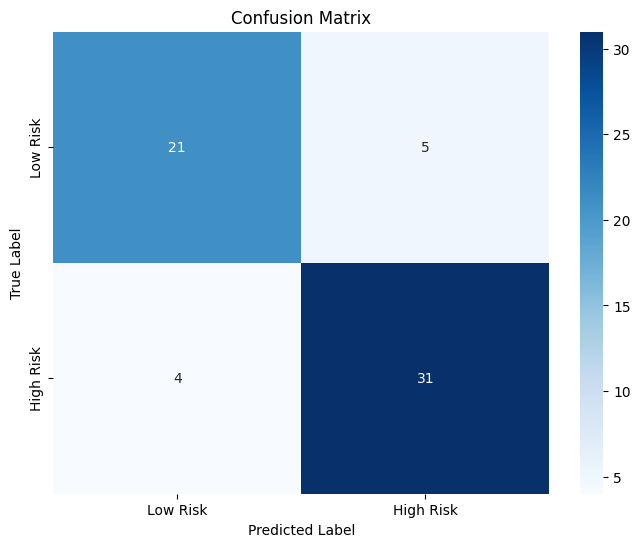

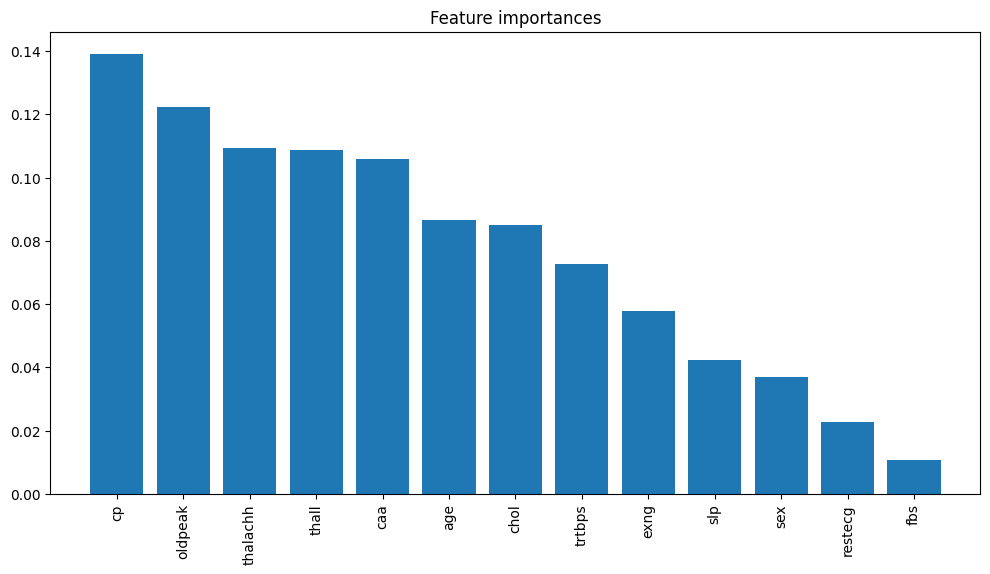

RandomForestClassifier()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

def heart_classification(data):
    """
    Build a model, that would classify risk category for heart attack. 
    Visualize model on a plot.

    Args:
        data: heart medical data.

    Returns:
        list: The list of model theta parameters.
    """
    X = data.drop('output', axis=1)
    y = data['output']
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

    model = RandomForestClassifier()

    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    
    accuracy = accuracy_score(y_val, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print("\nClassification Report:\n", classification_report(y_val, y_pred))
    
    conf_matrix = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Risk', 'High Risk'], yticklabels=['Low Risk', 'High Risk'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(12, 6))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices], align="center")
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()
    return model

data = extract_texts_from_file('resources/heart.csv')
heart_classification(data)

## Additional (extra credit)

There are more files in the `resources` folder. Take a look at the. Visualize data in these files. Choose ML algorithm for building a model and making predictions for new data. Visualize the model.

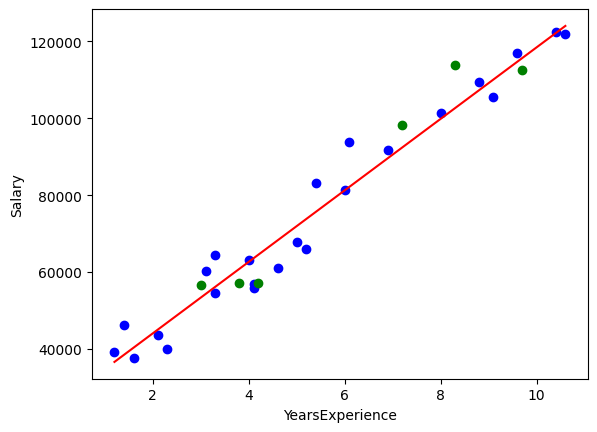

R2: 0.9394126230226044
MSE: 41327548.2797628


LinearRegression()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

def Salary_Prediction(data):
    x, y = (data["YearsExperience"].values.reshape(-1, 1), data["Salary"].values.reshape(-1, 1))
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    plt.scatter(x_train, y_train, color="blue")
    plt.scatter(x_test, y_test, color="green")
    plt.plot(x, model.predict(x), color="red")
    plt.xlabel("YearsExperience")
    plt.ylabel("Salary")
    plt.show()
    print(f"R2: {r2_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    return model 

data = extract_texts_from_file('resources/salary_dataset.csv')
Salary_Prediction(data)